<a href="https://colab.research.google.com/github/urvog/fashion_mnist/blob/main/Classificador_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

## Ejemplo: clasificador de imágenes usando Keras

<img src="https://www.neuraldojo.org/media/mnist_fashion.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

Para ilustrar la manera en que Keras es usado en el aprendizaje profundo, realizaremos un ejemplo de clasificación usando conjunto de datos *Fashion MNIST* el cual consta de 70,000 imágenes (las imágenes representan artículos de moda) en escala de grises de 28 × 28 píxeles cada una y con 10 clases. 

### Uso de Keras para cargar el conjunto de datos

Comencemos cargando el conjunto de datos Fashion MNIST. Keras tiene una serie de funciones para cargar conjuntos de datos populares en keras.datasets. El conjunto de datos ya está dividido entre un conjunto de entrenamiento y un conjunto de prueba, pero puede ser útil dividir aún más el conjunto de entrenamiento para tener un conjunto de validación:






In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


El conjunto de entrenamiento contiene 60,000 imágenes en escala de grises, cada una de 28x28 píxeles. Visualiza el tamaño del conjunto en la siguiente celda:

In [ ]:
X_train_full.shape

(60000, 28, 28)

La intensidad de cada píxel se representa como un byte (enteros entre 0 a 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

A continuación visualiza utilizando `matplotlib` el primer elemento del conjunto de entrenamiento (visualiza la matrix de valores) y comprueba el valor máximo y mínimo con una "*colorbar*". Además calcula de manera analítica los valores máximo y mínimo de la matriz.

In [ ]:
import matplotlib.pyplot as plt 


Max: 0
Min: 255


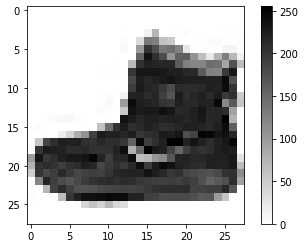

In [ ]:
image1 = X_train_full[0]
plt.imshow(image1, cmap = 'binary') #puede ser también 'gray_r'
plt.colorbar()
print("Max:",image1.min())
print("Min:",image1.max())

**Ahora** dividamos el conjunto de datos de entrenamiento en un conjunto de validación y un conjunto de entrenamiento (más pequeño). También escalamos las intensidades de píxeles en el rango 0-1 y las convertimos en flotantes al dividiéndolas por 255.

In [ ]:
#Coger los primeros 5000 datos para validación

X_valid, X_train = X_train_full[0:5000]/255.0,X_train_full[5000:60000]/255.0
X_test = X_test/255.0
y_valid, y_train = y_train_full[0:5000],y_train_full[5000:60000]



Visualicemos de nuevo la primera imagen del conjunto de datos usando y calculemos el máximo y mínimo para comprobar que hemos escalado bién. Comprueba además que los datos son de tipo `float`

Max: 0.0
Min: 1.0
Type: float64


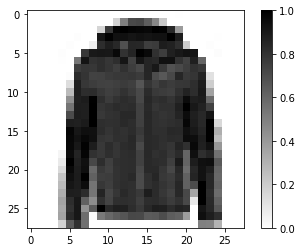

In [ ]:
image1 = X_train[0]
plt.imshow(image1, cmap = 'binary') #puede ser también 'gray_r'
plt.colorbar()
print("Max:",image1.min())
print("Min:",image1.max())
print("Type:", image1.dtype)

Las etiquetas van de 0 a 9, por lo que hay 10 tipos diferentes de ropa. Comprueba analitacamente que efectivamente, el vector `y_train` solamente tiene valores entre 0 y 9.

In [ ]:
import numpy as np

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#resultado solicitado

Los nombres para cada una de las clases anteriores son: 

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Por lo tanto, la clase 0 se corresponde con "T-shirt/top", la clase 1 con "Trouser" y así sucesivamente.

Comprobemos que la primera imagen en el conjunto de entrenamiento es un abrigo (Coat)

In [ ]:
print(class_names[y_train[0]])

Coat


El conjunto de validación contiene 5,000 imágenes, y el conjunto de test contiene 10,000 imágenes. Comprueba las dimensiones de dichos conjuntos.

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
#resultado solicitado

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#resultado solicitado

visualicemos ahora algunas de las imágenes de los datos de entrenamiento con su respectiva etiqueta

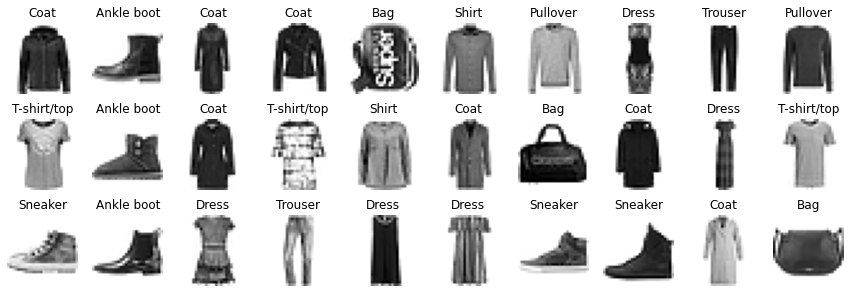

In [ ]:
fig, axs = plt.subplots(3, 10, figsize=(15,5))

n = 0
for i in range(0,10):
  for j in range(0,3):
    axs[j,i].imshow(X_train[n], cmap = 'binary')
    axs[j,i].set_title(class_names[y_train[n]])
    axs[j,i].axis('off')
    n+=1


## Uso de Keras para crean un modelo de aprendizaje profundo 


In [ ]:
keras.backend.clear_session()

Crea un modelo con la api de keras que tenga 2 capas ocultas de 300 y 100 neuronas respectivamente con función de activación *Relu*:

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(300, activation = 'relu'), #capa 1
                                    tf.keras.layers.Dense(100, activation = 'relu'), #capa 2                                    
                                    tf.keras.layers.Dense(10,activation='softmax') #salida clasificadora de con 10 clases del target
])

Utiliza el método `summary()`para visualizar el resumen de las capas y parámetros del modelo creado.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compilando el modelo

Después de crear un modelo, se debe llamar el método `compile()` para especificar la función de pérdida y el optimizador a utilizar. Opcionalmente, también puede especificar una lista de métricas  para calcular durante el entrenamiento y la evaluación:

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenando y evaluando el modelo

Ahora el modelo está listo para ser entrenado. Para esto simplemente necesitamos llamar a su método `fit()`. Le pasamos las características de entrada (X_train) y las clases de salida (y_train), así como la cantidad de épocas para entrenar (o de lo contrario, sería predeterminado a solo 1). También pasamos un conjunto de validación (esto es opcional): Keras medirá el `loss` y las métricas adicionales en este conjunto al final de cada época, lo cual es muy útil para ver qué cómo de bien se comporta el modelo realmente. Haz el `fit` del modelo y guárdalo en una variable llamada `history`

In [ ]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1640 - accuracy: 0.9369 - val_loss: 0.3730 - val_accuracy: 0.8942
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1553 - accuracy: 0.9408 - val_loss: 0.3653 - val_accuracy: 0.8950
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1513 - accuracy: 0.9422 - val_loss: 0.3683 - val_accuracy: 0.9020
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1500 - accuracy: 0.9415 - val_loss: 0.3851 - val_accuracy: 0.8964
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1439 - accuracy: 0.9448 - val_loss: 0.3812 - val_accuracy: 0.8994
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1417 - accuracy: 0.9457 - val_loss: 0.3711 - val_accuracy: 0.8928
Epoch 7/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1398 - accuracy: 0.9455 - val_loss: 0.4449 - val_accuracy:

¡Y eso es todo! La red neuronal está entrenada. En cada época durante el entrenamiento, Keras muestra el número de instancias procesadas hasta el momento (junto con una barra de progreso), el tiempo medio de entrenamiento, la pérdida (loss) y la precisión (accuracy), ambas calculadas en el conjunto de entrenamiento y el conjunto de validación.

El método `fit()` devuelve un objeto "History" que contiene los parámetros de entrenamiento (history.params), la lista de épocas por las que pasó (history.epoch) y, lo más importante, un diccionario (history.history) que contiene el *loss* y las métricas adicionales que midió al final de cada época en el conjunto de entrenamiento y en el conjunto de validación (si corresponde). 

Visualiza las curvas de aprendizaje guardadas en la variable `history` (creada anteriormente).

In [ ]:
import pandas as pd
df_history = pd.DataFrame(history.history)
df_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.723720,0.763018,0.520490,0.8250
1,0.491213,0.829636,0.454106,0.8432
2,0.445055,0.843873,0.416023,0.8572
3,0.418142,0.853182,0.425356,0.8516
4,0.397337,0.859782,0.414574,0.8534


In [ ]:
#resultado a obtener

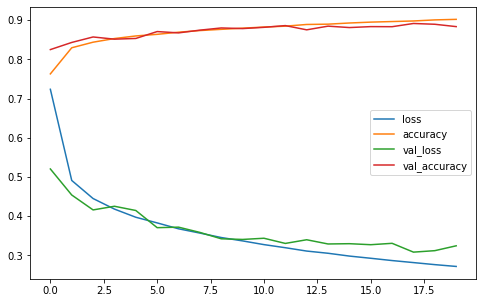

In [ ]:
#plotting 
df_history.plot(figsize=(8,5))

Se puede ver que tanto la precisión de entrenamiento como la de validación aumentan constantemente durante el entrenamiento, mientras que el *loss* de entrenamiento y validación disminuye. Ademas , las curvas de validación están bastante cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste (overfitting).

Ahora usemos el modelo ya entrenado sobre nuestros datos de prueba (X_test).

In [ ]:
model.evaluate(X_train,y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.1610 - accuracy: 0.9375


[0.16098563373088837, 0.9375454783439636]

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4229 - accuracy: 0.8848


[0.42288681864738464, 0.8848000168800354]

In [ ]:
 model.evaluate(X_valid,y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8918


[0.3763105869293213, 0.8917999863624573]

## Usando el modelo para hacer predicciones

Ahora, podemos usar el método `predict()` para hacer predicciones sobre nuevas instancias. Como no tenemos instancias nuevas reales, solo usaremos las primeras 3 instancias del conjunto de test:

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

¿Cómo interpretas las salida devuelta al predecir? A continuación utiliza la función `np.argmax` y obtén la clase predicha mediante el vector `class_names` calculado anteriormente.

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

Representa visualmente los datos de entrada para comprobar que las predicciones son correcta.

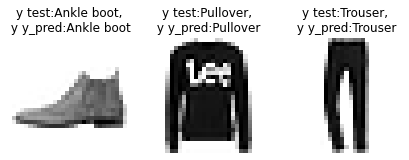

In [ ]:
plt.figure(figsize=(7,3))
for index, image in enumerate(X_new):
  plt.subplot(1,3, index+1)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
  plt.title(f"y test:{class_names[y_test[index]]},\n y y_pred:{class_names[y_pred[index]]}")